In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Student Depression Dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
# This project focuses on predicting student depression using machine learning by analyzing academic, lifestyle, and mental-health related factors.

Understand the Data

In [4]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [5]:
df['Financial Stress']=df['Financial Stress'].fillna(0)

In [6]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [7]:
df=df.drop(columns='id')

In [8]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [9]:
df.shape

(27901, 17)

In [10]:
df['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [11]:
sleep_map = {
    "Less than 5 hours": 4.0,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 8.5,
    "Others": 0
}

df["Sleep_Duration"] = df["Sleep Duration"].map(sleep_map)


In [12]:
df['Sleep Duration']=df['Sleep_Duration'].astype('float64')

In [ ]:
#The target variable represents whether a student is experiencing depression or not.
#Missing values were handled to avoid biased predictions.

Data Preprocessing in Machine Learning

In [13]:
df=pd.get_dummies(df,drop_first=True)

In [14]:
df.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Depression,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,33.0,5.0,0.0,8.97,2.0,0.0,5.5,3.0,1.0,1,...,False,False,False,False,False,False,False,False,True,False
1,24.0,2.0,0.0,5.90,5.0,0.0,5.5,3.0,2.0,0,...,False,False,False,False,False,False,False,False,False,True
2,31.0,3.0,0.0,7.03,5.0,0.0,4.0,9.0,1.0,0,...,False,False,False,False,False,False,False,False,False,True
3,28.0,3.0,0.0,5.59,2.0,0.0,7.5,4.0,5.0,1,...,False,False,False,False,False,False,False,False,True,True
4,25.0,4.0,0.0,8.13,3.0,0.0,5.5,1.0,1.0,0,...,False,False,False,False,False,False,False,False,True,False


Splitting the dataset

In [ ]:
#Categorical features were encoded so that ML models could process them.

In [15]:
y=df['Depression']
x=df.drop(columns='Depression')

In [16]:
x.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Sleep_Duration,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,33.0,5.0,0.0,8.97,2.0,0.0,5.5,3.0,1.0,5.5,...,False,False,False,False,False,False,False,False,True,False
1,24.0,2.0,0.0,5.90,5.0,0.0,5.5,3.0,2.0,5.5,...,False,False,False,False,False,False,False,False,False,True
2,31.0,3.0,0.0,7.03,5.0,0.0,4.0,9.0,1.0,4.0,...,False,False,False,False,False,False,False,False,False,True
3,28.0,3.0,0.0,5.59,2.0,0.0,7.5,4.0,5.0,7.5,...,False,False,False,False,False,False,False,False,True,True
4,25.0,4.0,0.0,8.13,3.0,0.0,5.5,1.0,1.0,5.5,...,False,False,False,False,False,False,False,False,True,False


Splitting Dataset into Training and Testing

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=54)

In [18]:
x_train.shape,x_test.shape

((19530, 107), (8371, 107))

In [ ]:
#The dataset was split into training and testing sets to evaluate real-world performance.
#This avoids overfitting and ensures the model generalizes well to unseen data.

Applying ML algothim to the training dataset 

In [19]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x_train,y_train)

LogisticRegression()

In [20]:
model_log.score(x_train,y_train)

0.8473118279569892

In [21]:
Log_before=model_log.score(x_test,y_test)

Applying Gridsearch CV to find the best parameters to the Logistic Function

In [22]:
penalty=['l1','l2']
c=[1.0,2.0,100.0,1000.0]
parameters={'penalty':penalty,'C':c}

In [23]:
from sklearn.model_selection import GridSearchCV
model_log_grid=GridSearchCV(estimator=LogisticRegression(),param_grid=parameters,scoring='accuracy',cv=5)
model_log_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [24]:
model_log_grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [25]:
model_log_grid.best_score_

np.float64(0.8453661034306196)

After Gridsearch
I got a best parameters to improve the model for performance

In [26]:
model_log_after_gird=LogisticRegression(C=1000.0,penalty='l2')
model_log_after_gird.fit(x_train,y_train)

LogisticRegression(C=1000.0)

In [27]:
model_log_after_gird.score(x_train,y_train)

0.8472606246799795

In [28]:
log_after=model_log_after_gird.score(x_test,y_test)

In [ ]:
#Accuracy  were used to evaluate models.

By using the default parameters only the accuracy or performance of the model is high when is compares to the after gridsearch cv getting the best parameters also applied algorithm we get less performance of the model 

Now By The KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
model_knn.score(x_train,y_train)

0.8567332309267793

In [31]:
knn_before=model_knn.score(x_test,y_test)


Now applying the gridsearchcv to see the best parameters for KNN

In [32]:
n_neighbors=[2,3,4,5,6,7,8,9,10,11,15,17]
leaf_size=[20,22,23,24,25,36,57,87]
weights=['uniform','distance']
parameters_knn={'n_neighbors':n_neighbors,'leaf_size':leaf_size,'weights':weights}

In [33]:
model_knn_grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters_knn,scoring='accuracy')
model_knn_grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 22, 23, 24, 25, 36, 57, 87],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15,
                                         17],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [34]:
model_knn_grid.best_params_

{'leaf_size': 20, 'n_neighbors': 15, 'weights': 'distance'}

In [35]:
model_knn_grid.best_score_

np.float64(0.8038914490527393)

In [36]:
model_knn_after_grid=KNeighborsClassifier(n_neighbors=15,weights='distance',leaf_size=20)
model_knn_after_grid.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=15, weights='distance')

In [37]:
model_knn_after_grid.score(x_train,y_train)

1.0

In [38]:
knn_after=model_knn_after_grid.score(x_test,y_test)

This shows that by the Default parameters we get low model performance after the gridsearch by the best parameters accurary and performance of the model is got little high

Now doing the Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
model_Naive=GaussianNB()
model_Naive.fit(x_train,y_train)

GaussianNB()

In [40]:
model_Naive.score(x_train,y_train)

0.4148489503328213

In [41]:
naive_before=model_Naive.score(x_test,y_test)

Now finding the best parameters

In [42]:

param_grid = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]}

grid = GridSearchCV(estimator=model_Naive,param_grid=param_grid,scoring="accuracy",cv=5,n_jobs=-1,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy', verbose=1)

In [43]:
grid.best_params_

{'var_smoothing': 1e-06}

In [44]:
grid.best_score_

np.float64(0.6303635432667691)

In [45]:
model_naive_after_grid=GaussianNB(var_smoothing=1e-06)
model_naive_after_grid.fit(x_train,y_train)

GaussianNB(var_smoothing=1e-06)

In [46]:
naive_after=model_naive_after_grid.score(x_test,y_test)

After Applying the best parameters i got little high in model performance

Applying random forest to the dataset

In [47]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier()
model_forest.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
forest_before=model_forest.score(x_test,y_test)

In [49]:
criterion=['gini','entropy']
max_depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
max_leaf_nodes=[10,20,30,40,50]
parameters_forest={'criterion':criterion,'max_depth':max_depth,'max_leaf_nodes':max_leaf_nodes}

In [50]:
model_forest_grid=GridSearchCV(estimator=model_forest,param_grid=parameters_forest,scoring='accuracy')
model_forest_grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_leaf_nodes': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [51]:
model_forest_grid.score(x_train,y_train)

0.8362519201228878

In [52]:
score_forest_after_grid=model_forest_grid.score(x_test,y_test)

In [53]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier()
model_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
tree_before=model_tree.score(x_test,y_test)

In [55]:
criterion=['gini','entropy']
max_depth=[1,2,3,4,5,6,7,8,9,10]
parameters_tree={'criterion':criterion,'max_depth':max_depth}

In [56]:
model_tree_grid=GridSearchCV(estimator=model_tree,param_grid=parameters_tree,scoring='accuracy')
model_tree_grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [57]:
model_tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [58]:
model_tree_grid.best_score_

np.float64(0.8289810547875064)

In [59]:
model_tree_after_grid=DecisionTreeClassifier(criterion='gini',max_depth=7)
model_tree_after_grid.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [60]:
tree_after=model_tree_after_grid.score(x_test,y_test)

In [61]:
model_tree_after_grid

DecisionTreeClassifier(max_depth=7)

In [62]:
from sklearn.svm import SVC
model_SVC_before_grid=SVC()
model_SVC_before_grid.fit(x_train,y_train)

SVC()

In [63]:
svc_before=model_SVC_before_grid.score(x_test,y_test)

In [64]:
kernel=['rdf','linear','poly','sigmoid']
C=[1.0,2.0,3.0,4.0]
parameters_svc={'kernel':kernel,'C':c}

In [65]:
model_svc_grid=GridSearchCV(estimator=model_SVC_before_grid,param_grid=parameters_svc,scoring='accuracy')
model_svc_grid.fit(x_train,y_train)

In [66]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier()
model_AdaBoost.fit(x_train,y_train)

AdaBoostClassifier()

In [67]:
model_AdaBoost.score(x_train,y_train)

0.8454685099846391

In [68]:
ada_before=model_AdaBoost.score(x_test,y_test)

In [69]:
n_estimators=[20,40,60,80,100,120,140]
parameters_ada={'n_estimators':n_estimators}
grid_ada=GridSearchCV(estimator=model_AdaBoost,param_grid=parameters_ada,scoring='accuracy')
grid_ada.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [20, 40, 60, 80, 100, 120, 140]},
             scoring='accuracy')

In [70]:
grid_ada.best_params_

{'n_estimators': 60}

In [71]:
model_ada2=AdaBoostClassifier(n_estimators=60)
model_ada2.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=60)

In [72]:
ada_after=model_ada2.score(x_test,y_test)

In [73]:
base_models=[('dtree',DecisionTreeClassifier()),('log',LogisticRegression()),('knn',KNeighborsClassifier())]
meta_model=LogisticRegression()

In [74]:
from sklearn.ensemble import StackingClassifier
model3=StackingClassifier(estimators=base_models,final_estimator=meta_model)
model3.fit(x_train,y_train)

StackingClassifier(estimators=[('dtree', DecisionTreeClassifier()),
                               ('log', LogisticRegression()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [75]:
model3.score(x_train,y_train)

0.8487967229902714

In [76]:
stacking=model3.score(x_test,y_test)

In [ ]:
#Comparing multiple models helps identify the best-performing algorithm instead of relying on assumptions

In [77]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    "Logistic",
    "KNN",
    "Naive Bayes",
    "Random Forest",
    "Decision Tree",
    "AdaBoost"
]

before_grid = [
    Log_before,
    knn_before,
    naive_before,
    forest_before,
    tree_before,
    ada_before
]

after_grid = [
    log_after,
    knn_after,
    naive_after,
    score_forest_after_grid,
    tree_after,
    ada_after
]


([<matplotlib.axis.XTick at 0x1c2663242f0>,
 [Text(0, 0, 'Logistic'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Naive Bayes'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'AdaBoost')])

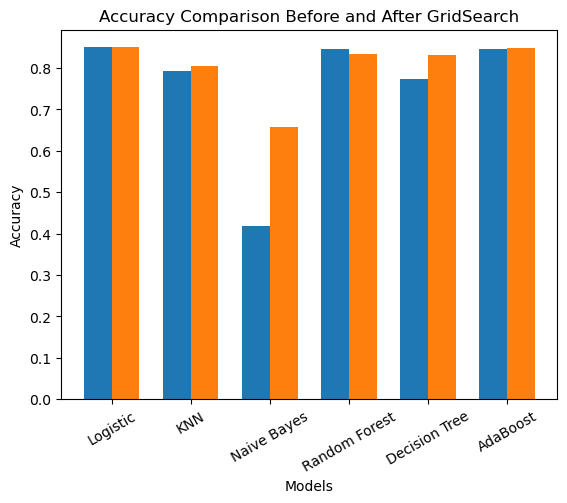

In [78]:
x = np.arange(len(models))
width = 0.35

plt.figure()
plt.bar(x - width/2, before_grid, width, label="Before GridSearch")
plt.bar(x + width/2, after_grid, width, label="After GridSearch")

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Before and After GridSearch")
plt.xticks(x, models, rotation=30)


In [ ]:
#Academic pressure and stress-related features strongly influence depression prediction.
#Lifestyle factors (sleep, habits) play a crucial role alongside academics.

# Conclusion

In [ ]:
#This project demonstrates how machine learning can assist in early detection of student depression,
#enabling timely intervention and promoting better mental health outcomes.